# Oasis2_longitudinal_demographics

## 불러오기

In [1203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1204]:
df= pd.read_csv('https://raw.githubusercontent.com/yonghyeun/Dementia_Analysis/main/data/oasis/oasis_demographic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


- Subject ID: 환자의 고유 ID
- MRI ID: MRI 검사의 고유 ID
- Group: 환자의 집단 (정상, 저하[치매], 초기에는 정상이었으나 나중에 저하된 경우)
- Visit: 환자 방문 횟수 
- MR Delay: Baseline 검사 이후 MRI 검사를 받기까지의 시간 (단위: 일)
- M/F: 환자의 성별 (M: 남성, F: 여성)
- Hand: 주 사용 손 (R: 오른손, L: 왼손)
- Age: 환자의 연령 (세)
- EDUC: 교육 수준 (년)
- SES: 사회 경제적 지위 (1: 하위층, 2: 중간층, 3: 상류층)
- MMSE: Mini Mental State Examination 점수 (0~30점, 높을수록 정상)
- CDR: Clinical Dementia Rating (0: 정상, 0.5: 경도인지장애, 1: 경중도, 2: 중증도)
- eTIV: estimated total intracranial volume (뇌내 전체 부피 추정치)
- nWBV: normalized whole brain volume (전체 뇌 부피를 개인의 두개골 크기로 보정한 값)
- ASF: atlas scaling factor (뇌 MRI 영상에 대한 전처리 과정에서 사용되는 값)

## 전처리

#### 1. Group 이진화 
- Converted에서 CDR이 0.0인 값은 Nondemented, 0.5이상은 Demented

#### 2. 불필요한 Feature 제거
- CDR은 Group과 큰 연관을 가지니 제거(정확도가 높아질 수 밖에 없음)
- MRI ID, Subject ID 제거
- Visit 제거
- 오른손잡이 밖에 없으므로 Hand 제거
- Visit을 제거했으니 MR Delay도 제거 -> Converted였다가 Demented로 바뀐 사람들만 MR Delay에 대한 값이 있을 것 같다.

In [1205]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

#### 1. Group 이진화 
- Converted에서 CDR이 0.0인 값은 Nondemented, 0.5이상은 Demented

In [1206]:
# Converted이면서 CDR 0.5인 ID 확인 
df[(df['Group']=='Converted')&(df['CDR']>=0.5)]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,M,R,84,20,1.0,26.0,0.5,1597,0.666,1.099
59,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,F,R,91,12,3.0,28.0,0.5,1463,0.696,1.199
83,OAS2_0041,OAS2_0041_MR3,Converted,3,1331,F,R,75,16,1.0,28.0,0.5,1314,0.760,1.335
115,OAS2_0054,OAS2_0054_MR2,Converted,2,846,F,R,87,18,1.0,24.0,0.5,1275,0.683,1.376
195,OAS2_0092,OAS2_0092_MR2,Converted,2,706,F,R,84,12,2.0,27.0,0.5,1390,0.728,1.263
219,OAS2_0103,OAS2_0103_MR2,Converted,2,1554,F,R,74,16,1.0,30.0,0.5,1423,0.722,1.233
220,OAS2_0103,OAS2_0103_MR3,Converted,3,2002,F,R,75,16,1.0,30.0,0.5,1419,0.731,1.236
246,OAS2_0118,OAS2_0118_MR2,Converted,2,1422,F,R,71,14,4.0,26.0,0.5,1529,0.788,1.147


In [1207]:
df[df['Subject ID']=='OAS2_0131']

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
271,OAS2_0131,OAS2_0131_MR1,Converted,1,0,F,R,65,12,2.0,30.0,0.5,1340,0.754,1.309
272,OAS2_0131,OAS2_0131_MR2,Converted,2,679,F,R,67,12,2.0,25.0,0.0,1331,0.761,1.318


In [1208]:
# OAS2_0131 제거 
dr = df[df['Subject ID']=='OAS2_0131']
df = df.drop(dr.index, axis=0)

- OAS2_0131_MR1 데이터는 이상치로 간주하고 제거
- 두 번째 방문 때 CDR이 오히려 낮아짐(0.5->0.0)
- 2년 사이에 eTIV가 낮아지고 nWBV가 높아짐 하지만 MMSE는 5나 떨어짐 ➡️ CDR 판단 기준에 MMSE보다 MRI가 큰 영향인가? 싶은 생각이 드는 데이터
- 섣부르게 판단 X

In [1209]:
# 진행이 비교적 느렸던 사람들(CDR이 0.0인데 Visit==2이상) -> 검사 주기가 빨랐는지, 연령에서 차이가 있는지 확인
df[df['Subject ID'].isin(['OAS2_0018','OAS2_0031','OAS2_0041','OAS2_0176'])]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
57,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,3.0,30.0,0.0,1430,0.718,1.227
58,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,3.0,30.0,0.0,1445,0.719,1.215
59,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,F,R,91,12,3.0,28.0,0.5,1463,0.696,1.199
81,OAS2_0041,OAS2_0041_MR1,Converted,1,0,F,R,71,16,1.0,27.0,0.0,1289,0.771,1.362
82,OAS2_0041,OAS2_0041_MR2,Converted,2,756,F,R,73,16,1.0,28.0,0.0,1295,0.768,1.356
83,OAS2_0041,OAS2_0041_MR3,Converted,3,1331,F,R,75,16,1.0,28.0,0.5,1314,0.760,1.335
346,OAS2_0176,OAS2_0176_MR1,Converted,1,0,M,R,84,16,2.0,30.0,0.0,1404,0.710,1.250


In [1210]:
# Nondemented가 될 Converted ID 
df[(df['Group']=='Converted')&(df['CDR']==0.0)]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
57,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,3.0,30.0,0.0,1430,0.718,1.227
58,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,3.0,30.0,0.0,1445,0.719,1.215
81,OAS2_0041,OAS2_0041_MR1,Converted,1,0,F,R,71,16,1.0,27.0,0.0,1289,0.771,1.362
82,OAS2_0041,OAS2_0041_MR2,Converted,2,756,F,R,73,16,1.0,28.0,0.0,1295,0.768,1.356
114,OAS2_0054,OAS2_0054_MR1,Converted,1,0,F,R,85,18,1.0,29.0,0.0,1264,0.701,1.388
194,OAS2_0092,OAS2_0092_MR1,Converted,1,0,F,R,83,12,2.0,28.0,0.0,1383,0.748,1.269
218,OAS2_0103,OAS2_0103_MR1,Converted,1,0,F,R,69,16,1.0,30.0,0.0,1404,0.750,1.250


In [1211]:
# Nondemented로 
df.loc[(df['Group']=='Converted')&(df['CDR']==0.0), 'Group'] = 'Nondemented'

In [1212]:
# Demented가 될 Converted ID 
df[(df['Group']=='Converted')&(df['CDR']==0.5)]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,M,R,84,20,1.0,26.0,0.5,1597,0.666,1.099
59,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,F,R,91,12,3.0,28.0,0.5,1463,0.696,1.199
83,OAS2_0041,OAS2_0041_MR3,Converted,3,1331,F,R,75,16,1.0,28.0,0.5,1314,0.760,1.335
115,OAS2_0054,OAS2_0054_MR2,Converted,2,846,F,R,87,18,1.0,24.0,0.5,1275,0.683,1.376
195,OAS2_0092,OAS2_0092_MR2,Converted,2,706,F,R,84,12,2.0,27.0,0.5,1390,0.728,1.263
219,OAS2_0103,OAS2_0103_MR2,Converted,2,1554,F,R,74,16,1.0,30.0,0.5,1423,0.722,1.233
220,OAS2_0103,OAS2_0103_MR3,Converted,3,2002,F,R,75,16,1.0,30.0,0.5,1419,0.731,1.236
246,OAS2_0118,OAS2_0118_MR2,Converted,2,1422,F,R,71,14,4.0,26.0,0.5,1529,0.788,1.147


In [1213]:
# Demented로 
df.loc[(df['Group']=='Converted')&(df['CDR']>=0.5), 'Group'] = 'Demented'

In [1214]:
# 확인하기
df['Group'].value_counts()

Nondemented    207
Demented       164
Name: Group, dtype: int64

In [1215]:
df['Visit'].value_counts()

1    149
2    143
3     58
4     15
5      6
Name: Visit, dtype: int64

#### 2. 불필요한 Feature 제거
- CDR은 제거
- Subject ID 제거
- MRI ID 제거
- Visit 제거
- Hand 제거
- MR Delay 제거 

In [1216]:
df.head(2)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876


In [1217]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [1218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  371 non-null    object 
 1   MRI ID      371 non-null    object 
 2   Group       371 non-null    object 
 3   Visit       371 non-null    int64  
 4   MR Delay    371 non-null    int64  
 5   M/F         371 non-null    object 
 6   Hand        371 non-null    object 
 7   Age         371 non-null    int64  
 8   EDUC        371 non-null    int64  
 9   SES         352 non-null    float64
 10  MMSE        369 non-null    float64
 11  CDR         371 non-null    float64
 12  eTIV        371 non-null    int64  
 13  nWBV        371 non-null    float64
 14  ASF         371 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 46.4+ KB


In [1219]:
# Feature 제거
data = df.drop(['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Hand', 'MMSE', 'CDR'], axis=1).copy()

# SES 뺄까 고민 중.. 빼지 않는다면 연속형이 아닌 범주형으로 바꿔야 할듯
# data.drop('SES', axis=1)


### 결측치 처리

In [1220]:
data.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [1221]:
data[data['EDUC']==12]['SES'].value_counts()

4.0    42
3.0    32
2.0    11
Name: SES, dtype: int64

<AxesSubplot:>

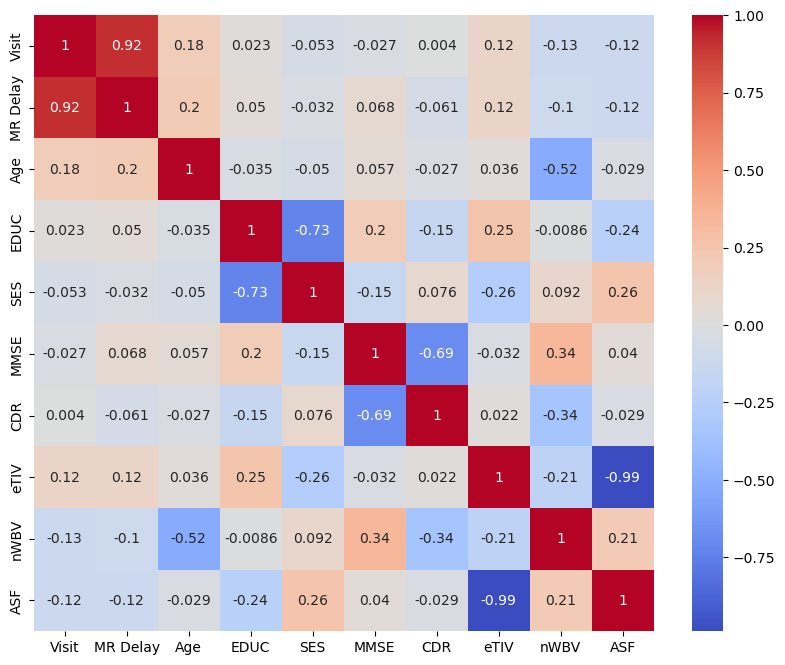

In [1222]:
# SES와 상관관계가 높은 변수 찾기 
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

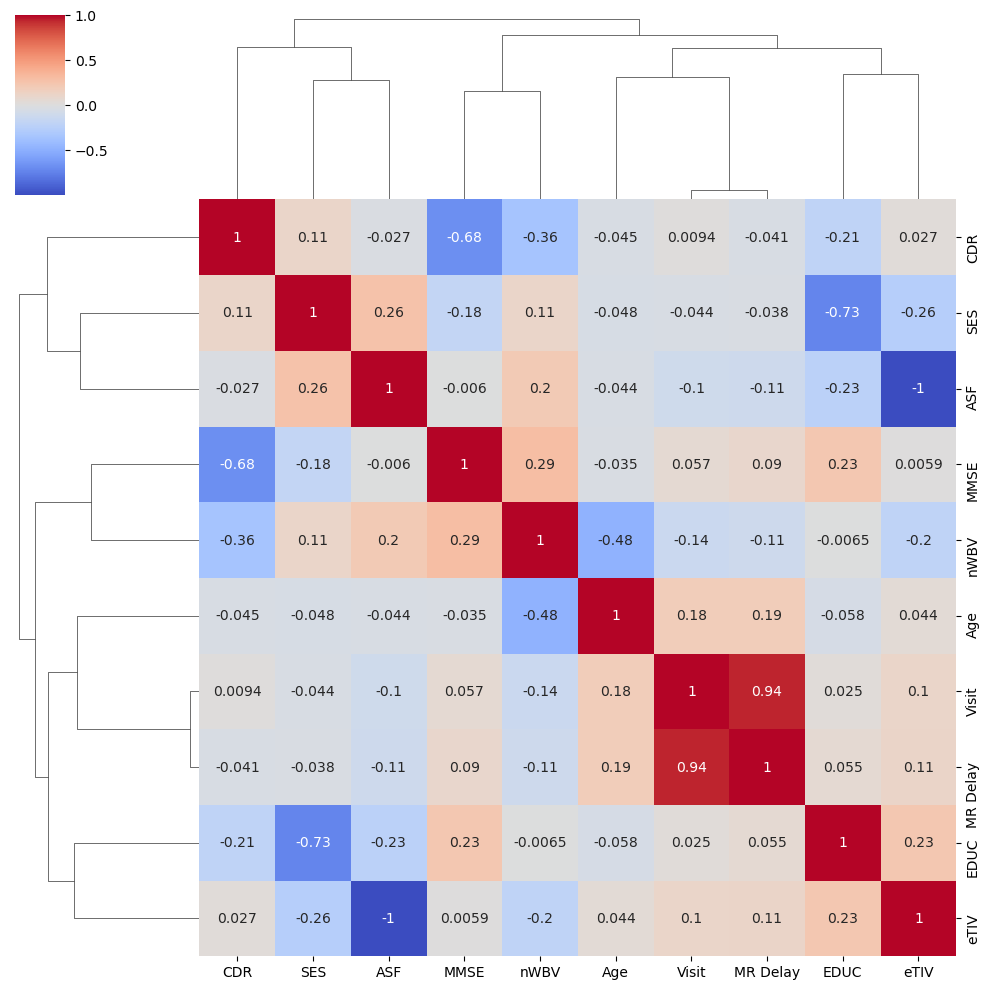

In [1223]:
corr = df.corr(method='spearman')
# plt.figure(figsize=(4, 2))
sns.clustermap(corr, annot=True, cmap='coolwarm')

- 역시 SES는 EDUC와 상관관계가 높게 나왔다. 
- EDUC와 SES간의 수치로 값을 채워봐야겠다.

<AxesSubplot:>

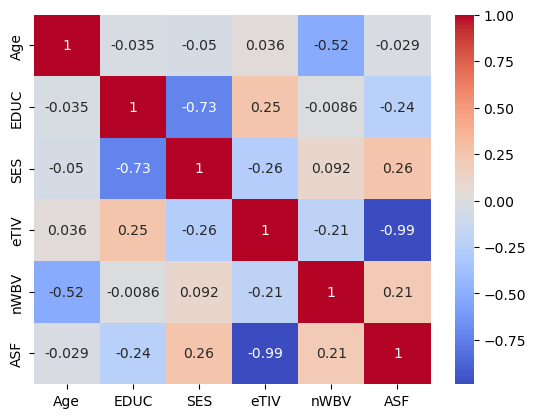

In [1224]:
cor = data.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')

In [1225]:
# SES가 nan인 데이터 확인
data['SES'].isnull().sum()

19

In [1226]:
data['SES']

0      2.0
1      2.0
2      NaN
3      NaN
4      NaN
      ... 
368    1.0
369    1.0
370    2.0
371    2.0
372    2.0
Name: SES, Length: 371, dtype: float64

In [1227]:
# 결측치 대체
data = data.fillna(data.mean())

# 결측치 제거
# data = data.dropna()

C:\Users\cyh51\AppData\Local\Temp\ipykernel_23208\1433660805.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


In [1228]:
data['SES']=data['SES'].astype(int)
data['SES']=data['SES'].astype(str)

data.head(2)

,Group,M/F,Age,EDUC,SES,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2,1987,0.696,0.883
1,Nondemented,M,88,14,2,2004,0.681,0.876


### 머신러닝

##### 독립변수, 종속변수 분리

In [1229]:
label_name = 'Group'
feature_name = data.drop(['Group'], axis=1).columns
label_name, feature_name


('Group',
 Index(['M/F', 'Age', 'EDUC', 'SES', 'eTIV', 'nWBV', 'ASF'], dtype='object'))

In [1230]:
data['M/F']

0      M
1      M
2      M
3      M
4      M
      ..
368    M
369    M
370    F
371    F
372    F
Name: M/F, Length: 371, dtype: object

In [1231]:
data['M/F'] = data['M/F'].map({'M': 1, 'F': 0})

In [1232]:
y = data[label_name]
X = pd.get_dummies(data[feature_name])

X.shape, y.shape

((371, 11), (371,))

In [1233]:
dt_y = y.map({'Demented': 1, 'Nondemented': 0}).astype('str')

##### train, test 나누기

In [1234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dt_y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((296, 11), (296,), (75, 11), (75,))

In [1235]:
# stratify=y 로 비율 잘 나뉘었는지 확인
pd.Series(y_test).value_counts(1)

0    0.56
1    0.44
Name: Group, dtype: float64

<AxesSubplot:>

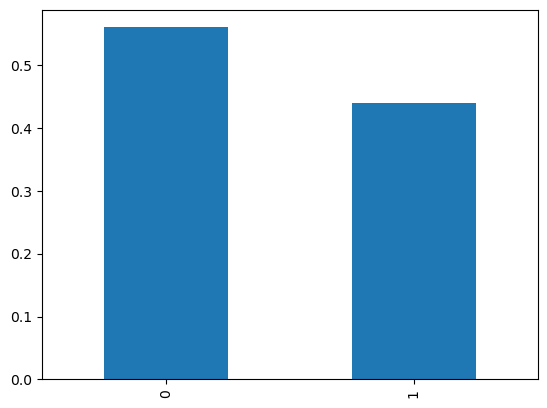

In [1236]:
y_test.value_counts(1).plot(kind='bar')

##### train, val 나누기


In [1237]:
train = pd.concat([X_train, y_train], axis=1)
test = X_test
train.shape, test.shape

((296, 12), (75, 11))

In [1238]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((236, 11), (236,), (60, 11), (60,))

<AxesSubplot:>

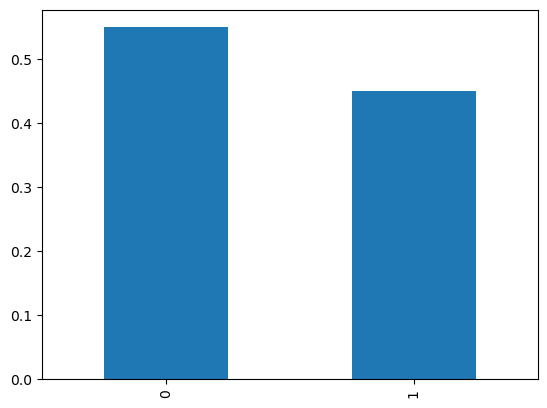

In [1239]:
y_valid.value_counts(1).plot(kind='bar')


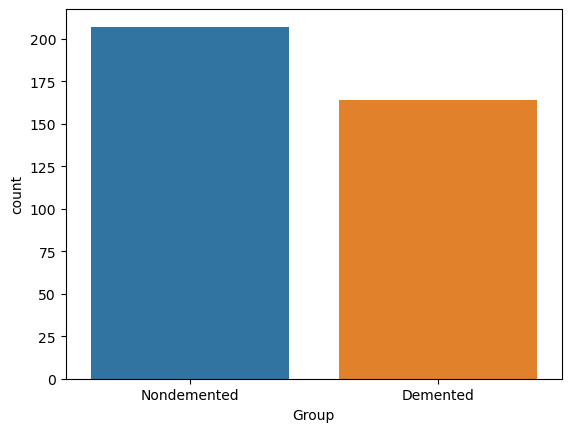

In [1240]:
# 정답값 분포 확인
sns.countplot(data=data, x=label_name);

## 모델링
#### 1. Classification 
- 의사결정나무로 plot, Group이 Demented인지 Nondemented인지 예측 
#### 2. Regression
- 로지스틱 회귀분석
- 회귀계수를 사용해서 feature 값의 증감에 따른 정답값 증감 비율 예측 

### 1. Classification 
- 의사결정나무로 plot, Group이 Demented인지 Nondemented인지 예측 

### 의사결정나무

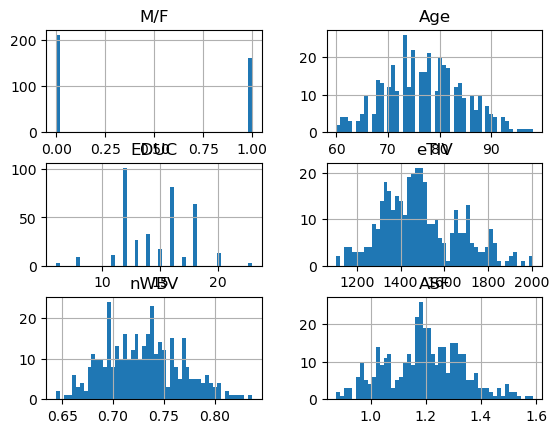

In [1241]:
data.hist(bins=50);

In [1242]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dt_model= DecisionTreeClassifier(random_state=42)
dt_model

DecisionTreeClassifier(random_state=42)

In [1243]:
# fit
dt_model.fit(X_train, y_train)

# predict
dt_y_predict = dt_model.predict(X_valid)

In [1244]:
# y_val, y_pred 비교
(y_valid == dt_y_predict).mean()

0.7833333333333333

In [1245]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid, dt_y_predict)
accuracy

0.7833333333333333

In [1246]:
# crosstab
pd.crosstab(y_valid, dt_y_predict)

col_0,0,1
Group,,
0,31,2
1,11,16


In [1247]:
# predict
dt_y_test = dt_model.predict(X_test)

In [1248]:
(y_test == dt_y_test).mean()

0.5866666666666667

In [1249]:
# crosstab
pd.crosstab(y_test, dt_y_test)

col_0,0,1
Group,,
0,32,10
1,21,12


In [1250]:
from sklearn.tree import export_text

print(export_text(dt_model, feature_names=X_train.columns.tolist()))

|--- nWBV <= 0.73
|   |--- EDUC <= 16.50
|   |   |--- eTIV <= 1272.50
|   |   |   |--- nWBV <= 0.70
|   |   |   |   |--- class: 1
|   |   |   |--- nWBV >  0.70
|   |   |   |   |--- class: 0
|   |   |--- eTIV >  1272.50
|   |   |   |--- SES_1 <= 0.50
|   |   |   |   |--- ASF <= 1.05
|   |   |   |   |   |--- nWBV <= 0.70
|   |   |   |   |   |   |--- Age <= 82.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  82.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- nWBV >  0.70
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- ASF >  1.05
|   |   |   |   |   |--- nWBV <= 0.71
|   |   |   |   |   |   |--- ASF <= 1.36
|   |   |   |   |   |   |   |--- nWBV <= 0.70
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- nWBV >  0.70
|   |   |   |   |   |   |   |   |--- EDUC <= 11.50
|   |   |   |   |   |   |   |   |   |--- Age <= 81.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   | 

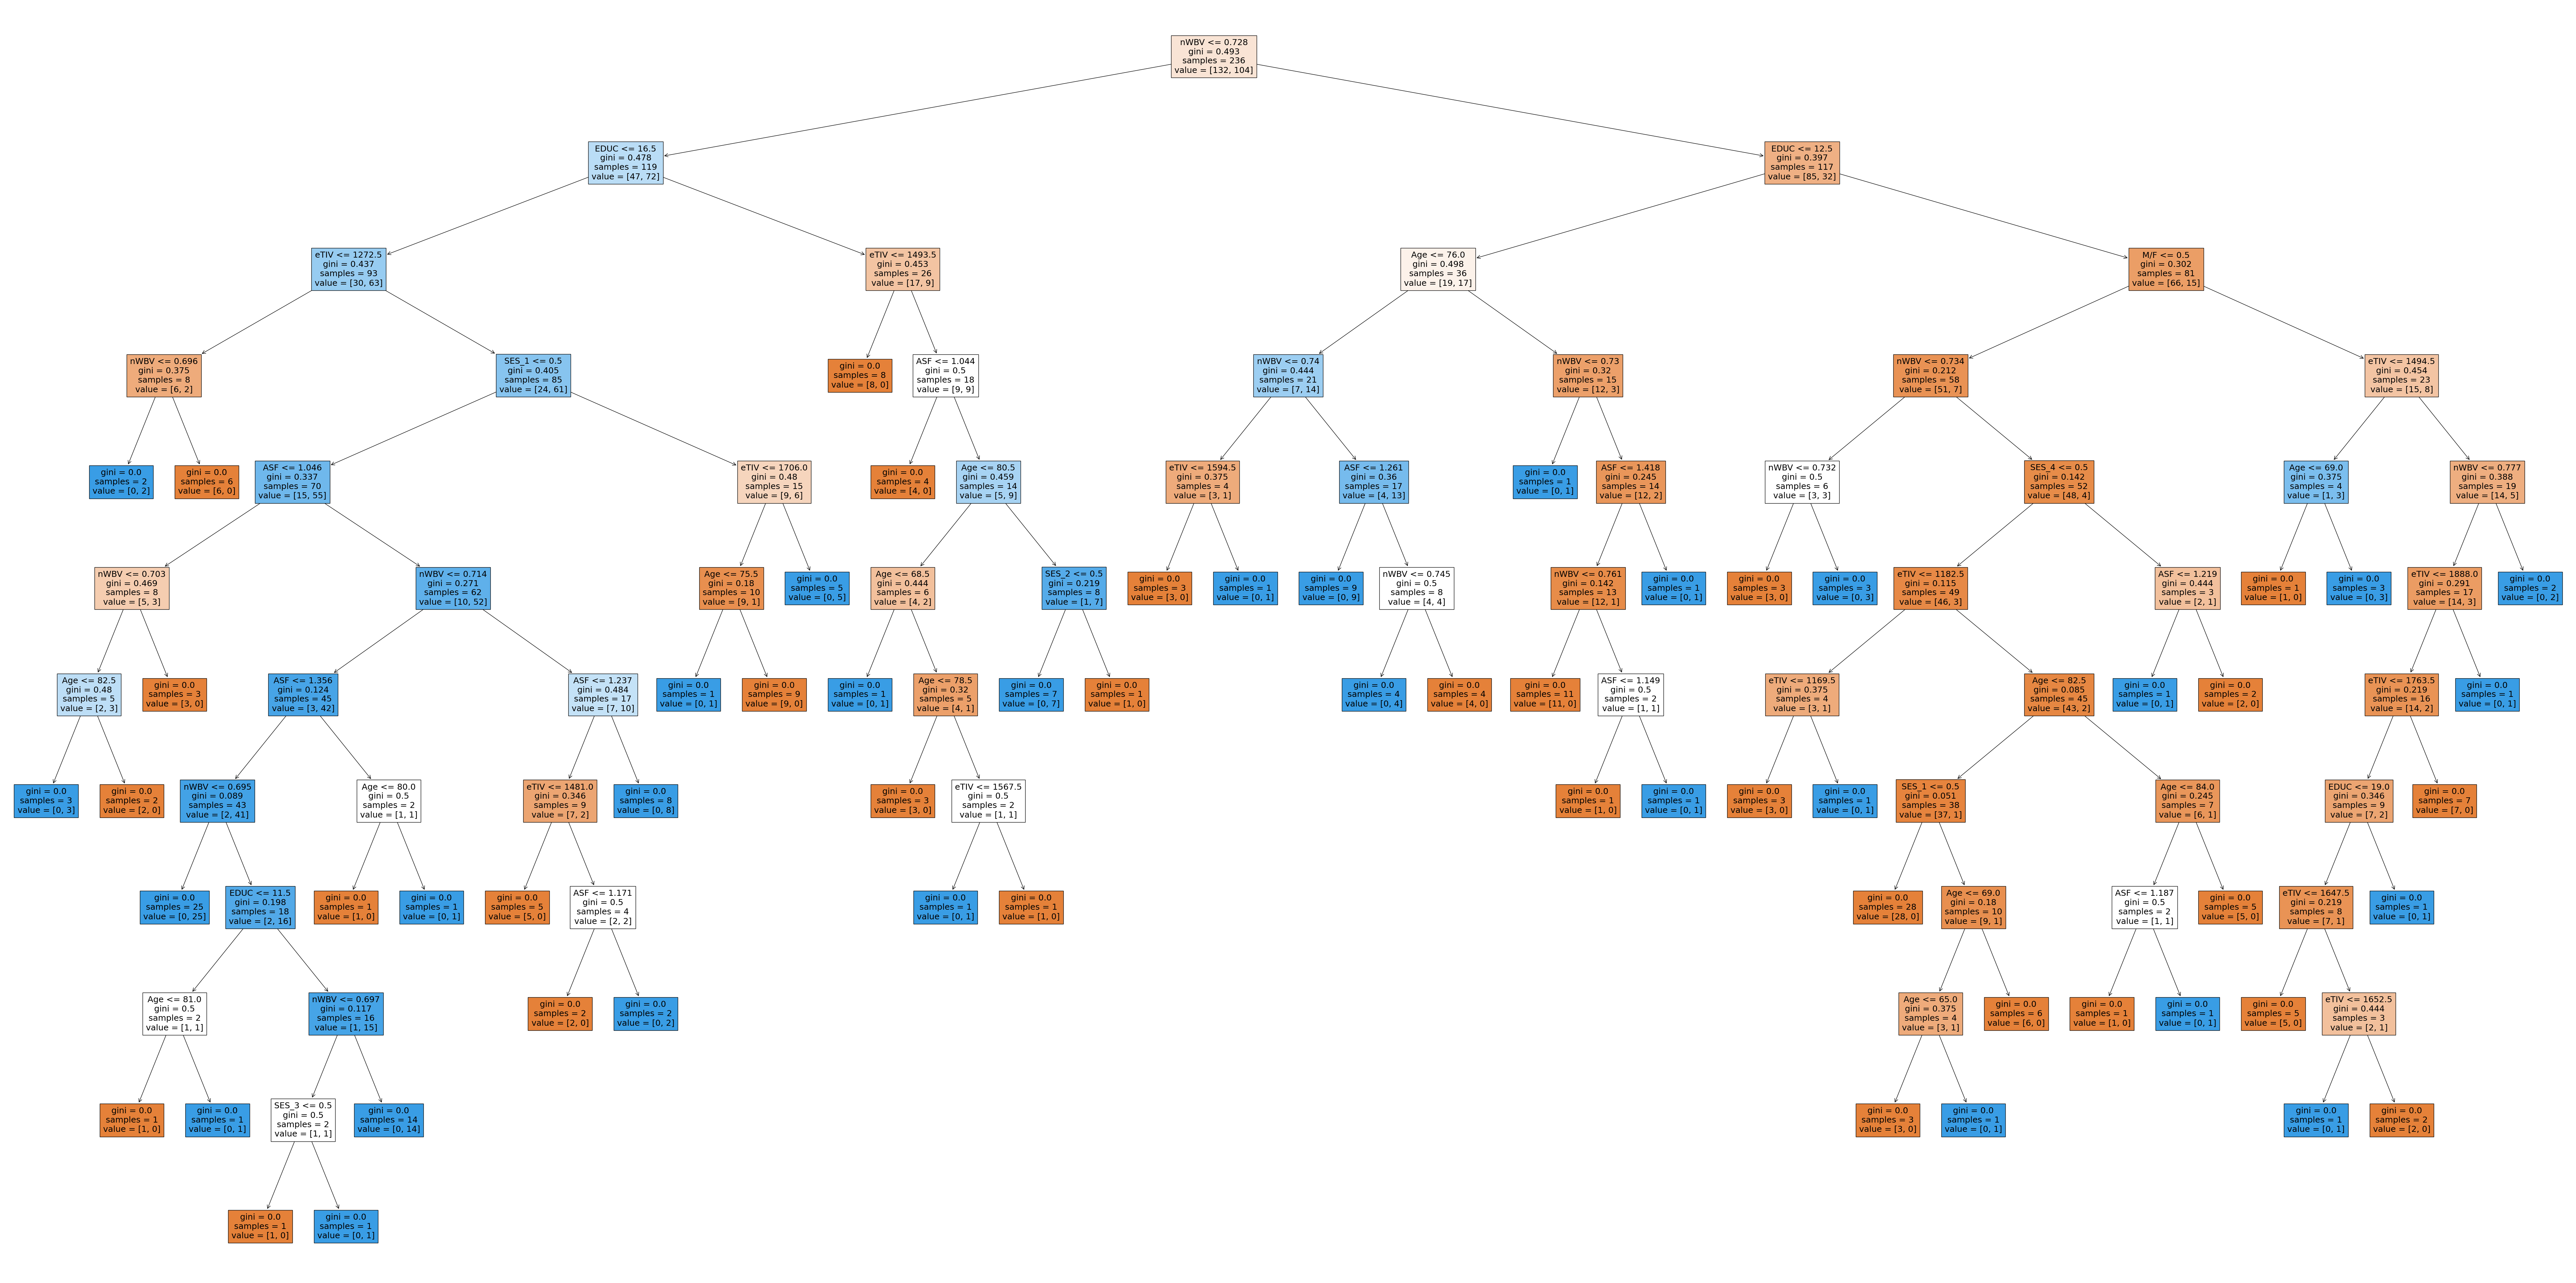

In [1251]:
# plot_tree 로 시각화 하기
from sklearn.tree import plot_tree
plt.figure(figsize=(100,50))
plot_tree(dt_model, filled=True,
         feature_names=X_train.columns.tolist());

<AxesSubplot:>

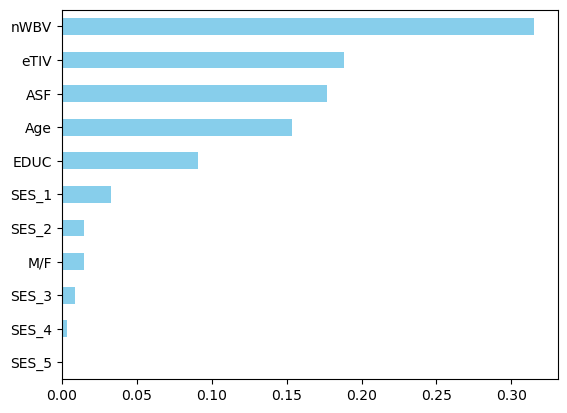

In [1252]:
# feature_importances_로 피처 중요도 확인하기
fi = pd.Series(dt_model.feature_importances_)
fi.index = dt_model.feature_names_in_
fi.sort_values().plot.barh(color='Skyblue')

### 2. Regression
- 로지스틱 회귀분석
- 회귀계수를 사용해서 feature 값의 증감에 따른 정답값 증감 비율 예측 

In [1253]:
lr_y = pd.get_dummies(y)['Demented']

In [1254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, lr_y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((296, 11), (296,), (75, 11), (75,))

In [1255]:
train = pd.concat([X_train, y_train], axis=1)
test = X_test
train.shape, test.shape

((296, 12), (75, 11))

In [1256]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((236, 11), (236,), (60, 11), (60,))

In [1257]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

c:\Users\cyh51\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1258]:
# 모델 예측
y_pred = lr_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
print(f"Val Accuracy: {accuracy:.4f}")

Val Accuracy: 0.5833


In [1259]:
# 모델 예측
y_pred = lr_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.6000


In [1260]:
train

,M/F,Age,EDUC,eTIV,nWBV,ASF,SES_1,SES_2,SES_3,SES_4,SES_5,Demented
321,0,76,14,1236,0.764,1.419,0,0,1,0,0,1
282,0,75,16,1106,0.767,1.587,0,1,0,0,0,0
20,0,80,16,1323,0.738,1.326,0,1,0,0,0,0
33,0,87,14,1406,0.715,1.248,1,0,0,0,0,0
140,1,62,18,1928,0.731,0.910,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
141,1,67,12,1440,0.727,1.219,0,0,0,1,0,0
313,0,77,18,1559,0.713,1.125,1,0,0,0,0,0
38,1,84,20,1597,0.666,1.099,1,0,0,0,0,1
198,1,71,18,1769,0.699,0.992,1,0,0,0,0,0


In [1261]:
train.columns

Index(['M/F', 'Age', 'EDUC', 'eTIV', 'nWBV', 'ASF', 'SES_1', 'SES_2', 'SES_3',
       'SES_4', 'SES_5', 'Demented'],
      dtype='object')

In [1263]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.formula.api import ols

# 회귀모형 적합
ols_model = smf.ols(formula='Demented ~ Age + EDUC + eTIV + nWBV + ASF + SES_1 + SES_2 + SES_3 + SES_4 + SES_5', data=train).fit()


# 예측값과 잔차 계산
ols_y_pred = ols_model.predict(X_valid)
residuals = y_valid - y_pred


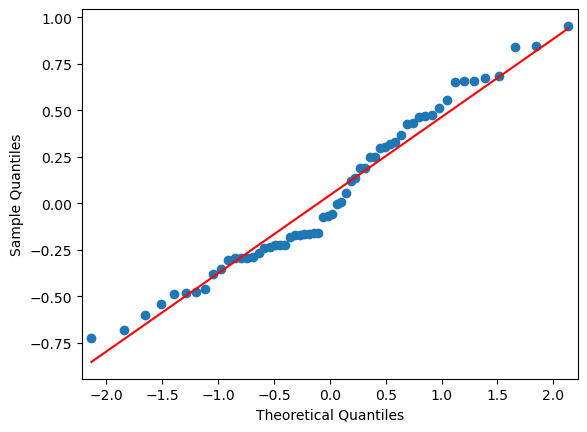

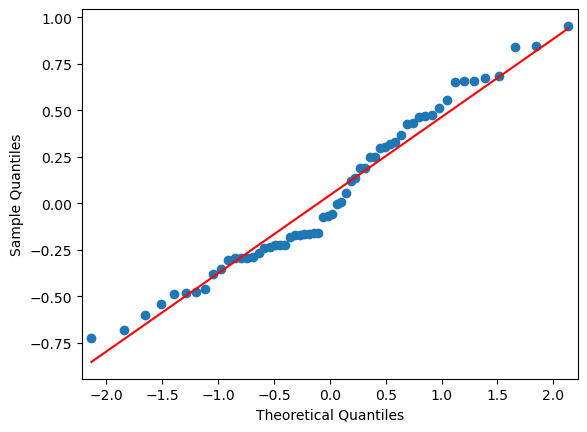

In [1264]:
# 정규성 검정
sm.qqplot(residuals, line='s')


<AxesSubplot:>

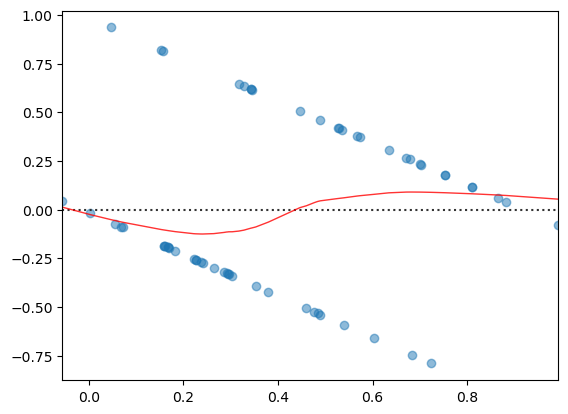

In [1265]:
# 등분산성 검정
sns.residplot(x=ols_y_pred, y=residuals, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

<AxesSubplot:>

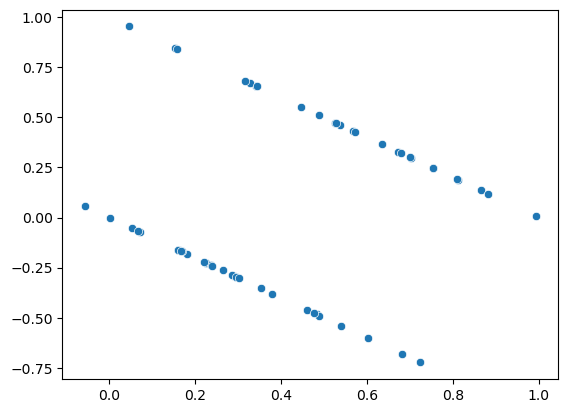

In [1266]:
# 독립성 검정
sns.scatterplot(x=ols_y_pred, y=residuals)

<AxesSubplot:ylabel='Count'>

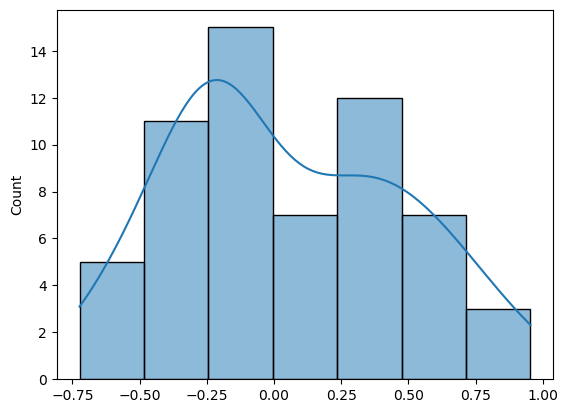

In [1267]:
# 잔차의 분포
sns.histplot(residuals, kde=True)

In [1271]:
# y = ax+b에서 b
lr_model.intercept_

array([0.70859575])

In [1276]:
# y = ax+b에서 a 
lr_model.coef_

array([[ 1.63388983e+00,  8.98342337e-03, -1.71131930e-01,
        -9.16844644e-04, -1.45525152e-01,  1.28493123e+00,
         1.03152453e-01, -4.80490602e-02,  1.07835619e-01,
        -1.68928447e-01,  5.94238398e-01]])

In [1274]:
X_train.columns.tolist()

['M/F',
 'Age',
 'EDUC',
 'eTIV',
 'nWBV',
 'ASF',
 'SES_1',
 'SES_2',
 'SES_3',
 'SES_4',
 'SES_5']

In [1280]:
lr_model.coef_.flatten()

array([ 1.63388983e+00,  8.98342337e-03, -1.71131930e-01, -9.16844644e-04,
       -1.45525152e-01,  1.28493123e+00,  1.03152453e-01, -4.80490602e-02,
        1.07835619e-01, -1.68928447e-01,  5.94238398e-01])

In [1284]:
# 변수명 리스트 생성
var_names = X_train.columns.tolist() 

# 회귀계수와 변수명을 하나의 데이터프레임으로 만들기
coef_df = pd.DataFrame({'coef': lr_model.coef_.flatten()}, index=var_names)
coef_df

,coef
M/F,1.633890
Age,0.008983
EDUC,-0.171132
eTIV,-0.000917
nWBV,-0.145525
ASF,1.284931
SES_1,0.103152
SES_2,-0.048049
SES_3,0.107836
SES_4,-0.168928


In [1298]:
# odds(승산비) : 변수가 1 오를 때 치매일 확률이 몇배 높아지는지 확인
import math
odds = np.exp(lr_model.coef_)
odds.flatten()

array([5.1237666 , 1.0090239 , 0.84271039, 0.99908358, 0.86456814,
       3.61441939, 1.10866041, 0.95308703, 1.11386463, 0.84456933,
       1.81165066])

In [1299]:
lr_model.coef_.flatten()

array([ 1.63388983e+00,  8.98342337e-03, -1.71131930e-01, -9.16844644e-04,
       -1.45525152e-01,  1.28493123e+00,  1.03152453e-01, -4.80490602e-02,
        1.07835619e-01, -1.68928447e-01,  5.94238398e-01])

In [1300]:
# 회귀계수와 승산비를 하나의 데이터프레임으로 만들기
odds_df = pd.DataFrame({'coef': lr_model.coef_.flatten(),
                        'odds': odds.flatten()}, index=var_names)
odds_df

,coef,odds
M/F,1.633890,5.123767
Age,0.008983,1.009024
EDUC,-0.171132,0.842710
eTIV,-0.000917,0.999084
nWBV,-0.145525,0.864568
ASF,1.284931,3.614419
SES_1,0.103152,1.108660
SES_2,-0.048049,0.953087
SES_3,0.107836,1.113865
SES_4,-0.168928,0.844569
